In [101]:
import numpy as np
import matplotlib.pyplot as plt
def gradient_descent(f, grad_f, x0, kmax, lr='Armijo', tolf = 10e-6, tolx = 10e-6):
    '''
    Inputs : 
       - f is a python function
       - grad_f is a python function
       - x0 is the starting guess
       - tolf and tolx are conditions
       - kmax is maximum number of iteration, to avoid infinite loops
       - lr is the value of alpha, if None the armijo rule is applied
    Returns :
       x --> stationary point
       f_val --> A vector containing the values of f during the iterations
       err_val --> A vector containing the values of || grad(f(Xk) || 
    '''
    
    # Set the iteration conuter
    k = 0

    # Define the vectors to return
    fval = np.zeros((kmax + 2,))
    err_val = np.zeros((kmax + 1,))
    grads = np.zeros((kmax + 1, x0.shape[0]))
    x_val = np.zeros((kmax + 2, x0.shape[0]))
    
    # Initialize the condition to broke the loop
    conditions = False  
    
    # Lets keep track of the first guess
    first_value = x0
    
    # Extract the dimension of the function domain
    N = x0.shape[0]

    x_val[0] = np.reshape(x0, len(x0))
    fval[0] = f(x0)
    while not conditions:
        # Update alpha if Armijo is selected
        if lr == 'Armijo':
            alpha = backtracking(f, grad_f, x0)
        else : 
            alpha = lr
        # Compute the gradient
        grad = grad_f(x0)

        # Compute the new set of parameters
        x = x0 - grad * alpha

        # Update the arrays
        x_val[k + 1] = np.reshape(x, len(x))
        grads[k] = np.reshape(grad, (N,))
        fval[k + 1] = f(x)
        err_val[k] = np.linalg.norm(x - x0)

        # Check the conditions
        conditions = (
            k >= kmax or 
            np.linalg.norm(grad_f(x)) < tolf * np.linalg.norm(grad_f(first_value)) or
            err_val[k] < tolx * np.linalg.norm(x0)  
        )
        
        # Update the parameters
        x0 = x
        
        k += 1


    fval = fval[:k]
    err_val = err_val[:k]
    x_val = x_val[:k, :]
    grads = grads[:k, :]

    return x, fval, err_val, x_val, grads

def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

In [25]:
def f1(x):
    return (x[0] - 3)**2 + (x[1] -1)**2
def grad_f1(x):
    return np.array( (2 * (x[0] - 3), 2 * (x[1] - 1)) )

def f2(x): 
    return 10 * (x[0] - 1)**2 + (x[1] - 2)**2
def grad_f2(x):
    return np.array( (20 * (x[0] - 1), 2 * (x[1] - 2)) )
    
def f3(N):
    '''      
    Returns the function f3 ready to be used with parameters setted
    '''
    v = np.arange(0, 1, 1 / N)
    A = np.vander(v)
    b = A @ np.ones((A.shape[0], 1))
    return lambda x : 0.5 * np.linalg.norm(A @ x - b)**2

def grad_f3(N):
    ''' 
    Returns a row vector with the gradient
    '''
    v = np.arange(0, 1, 1 / N)
    A = np.vander(v)
    b = A @ np.ones((A.shape[1], 1))
    return lambda x : (A.T @ (A @ x - b)).reshape(x.shape[0], 1)

def f4(N, lmbd):   
    '''      
    Returns a parametrized function 
    '''
    v = np.arange(0, 1, 1 / N)
    A = np.vander(v)
    b = A @ np.ones((A.shape[1], 1))
    return lambda x : 0.5 * np.linalg.norm(A @ x - b) + lmbd / 2 * np.linalg.norm(x)**2

def grad_f4(N, lmbd):
    v = np.arange(0, 1, 1 / N)
    A = np.vander(v)
    b = A @ np.ones((A.shape[1], 1))
    return lambda x: ((A @ x - b).T @ A + lmbd * x.T).reshape(x.shape[0], 1)

def f5(x):
    return x**4 + x**3 - 2 * x**2 - 2 * x
def grad_f5(x):
    return np.array(4 * x**3 + 3 * x **2 - 4 * x - 2)

# f1

In [38]:
def f1_plots(grads, legend, real_min, x_val, x, title): 
    plt.plot(range(grads.shape[0]), np.linalg.norm(grads, axis = 1))
    plt.title("Error on the gradient")
    plt.xlabel("Number of iterations")
    plt.ylabel("Norm of the gradient")
    plt.legend(legend, title=title)
    
    plt.subplot(1, 3, 2)
    plt.plot(range(x_val.shape[0]), np.linalg.norm(x_val - real_min, axis = 1))
    plt.title("Real error of GD procedure")
    plt.xlabel("Number of iterations")
    plt.ylabel("||X - Xtrue||")
    plt.legend(legend, title=title)

    plt.subplot(1, 3, 3)
    plt.plot(range(x_val.shape[0]), np.linalg.norm(x_val - x.T, axis = 1))
    plt.title("Step of x w.r.t the first iteration")
    plt.xlabel("Number of iterations")
    plt.ylabel("||Xk -X*||")
    plt.legend(legend, title=title)

--------------------------------------------------------------------
--------------------------------------------------------------------
GD when alpha changes


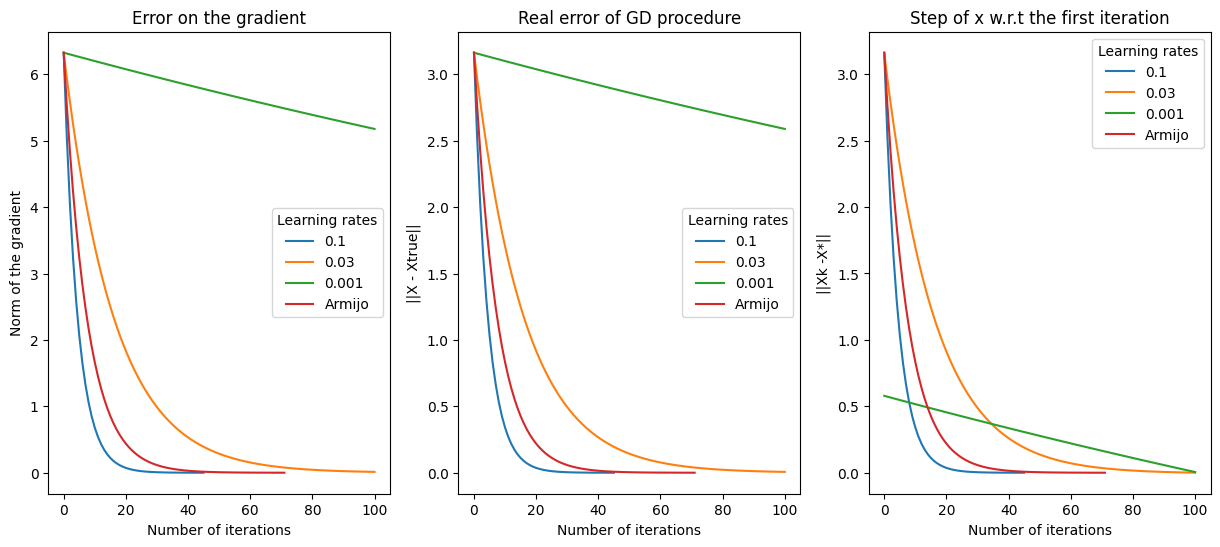

1:
Minimum obtained : [[2.99989547]
 [0.99996516]] 
lr : 0.1 
Number of iterations : 46
2:
Minimum obtained : [[2.99420525]
 [0.99806842]] 
lr : 0.03 
Number of iterations : 101
3:
Minimum obtained : [[0.54921099]
 [0.18307033]] 
lr : 0.001 
Number of iterations : 101
4:
Minimum obtained : [[2.99979969]
 [0.99993323]] 
lr : Armijo 
Number of iterations : 72
--------------------------------------------------------------------
--------------------------------------------------------------------
GD when starting guess changes


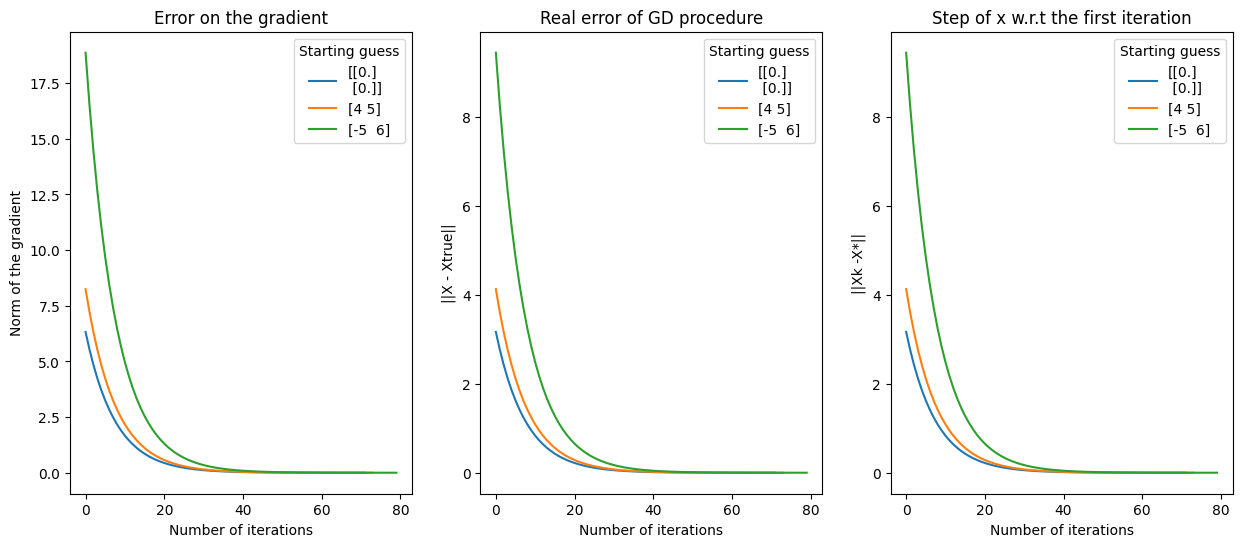

--------------------------------------------------------------------
--------------------------------------------------------------------
GD when tolerance changes
Iterations number = 91 tolf = 1e-06
Iterations number = 109 tolf = 1e-07
Iterations number = 126 tolf = 1e-08
Iterations number = 263 tolf = 1e-30


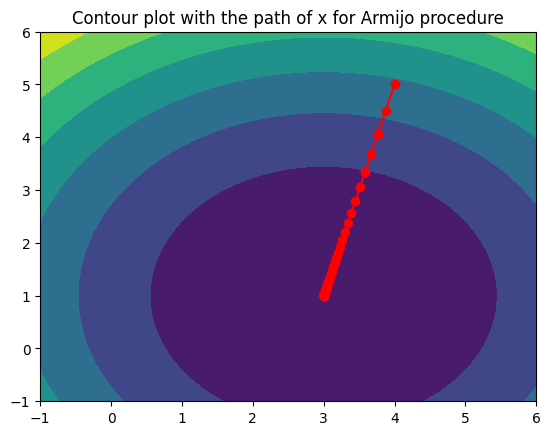

In [46]:
x0 = np.zeros((2, 1))

lrates = [0.1, 0.03, 0.001, "Armijo"]
colors = ['blue', 'orange', 'green', 'red']
real_min = np.array([3, 1])
min_predicted = []
iterations = []
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")
print("GD when alpha changes")
plt.figure(figsize=(15, 6))
for i, lr in enumerate(lrates):
    plt.subplot(1, 3, 1)
    x , _, err_val, x_val, grads = gradient_descent(f1, grad_f1, x0, kmax = 100 , lr=lr) 
    f1_plots(grads, lrates, real_min, x_val, x, "Learning rates")
    min_predicted.append(x)
    iterations.append(grads.shape[0])
plt.show()

for i, min in enumerate(min_predicted):
    print("{}:\nMinimum obtained : {} \nlr : {} \nNumber of iterations : {}".format(i+1, min, lrates[i], iterations[i]))

print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")
print("GD when starting guess changes")
st_guesses = [
    np.zeros((2, 1)),
    np.array([4, 5]),
    np.array([-5, 6])
]

plt.figure(figsize=(15, 6))
for i, sg in enumerate(st_guesses):
    plt.subplot(1, 3, 1)
    x , _, err_val, x_val, grads = gradient_descent(f1, grad_f1, sg, kmax = 100 , lr='Armijo') 
    f1_plots(grads, st_guesses, real_min, x_val, x, "Starting guess")
plt.show()
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")
print("GD when tolerance changes")
tolf_list = [1e-6, 1e-7, 1e-8, 1e-30]
iterations = []
for tol in tolf_list:
    x , _, err_val, x_val, grads = gradient_descent(
                                                    f1, grad_f1,
                                                    st_guesses[1], kmax = 1000 ,
                                                    lr='Armijo', tolf=tol, tolx=tol
                                    )     
    print("Iterations number = {} tolf = {}".format(grads.shape[0], tol))

# Contour
xv = np.linspace(-1, 6, 3000)
yv = np.linspace(-1, 6, 3000)
xx, yy = np.meshgrid(xv, yv)
# compute the value of f over the grid
zz = f1((xx, yy))
plt.plot(x_val[:, 0], x_val[:, 1], 'o-', c='red')
plt.contourf(xx, yy, zz)
plt.title("Contour plot with the path of x for Armijo procedure")
plt.show()

#### f2

In [ ]:
def f2_plots(grads, legend, real_min, x_val, x, title): 
    plt.plot(range(grads.shape[0]), np.linalg.norm(grads, axis = 1))
    plt.title("Error on the gradient")
    plt.xlabel("Number of iterations")
    plt.ylabel("Norm of the gradient")
    plt.legend(legend, title=title)
    
    plt.subplot(1, 3, 2)
    plt.plot(range(x_val.shape[0]), np.linalg.norm(x_val - real_min, axis = 1))
    plt.title("Real error of GD procedure")
    plt.xlabel("Number of iterations")
    plt.ylabel("||X - Xtrue||")
    plt.legend(legend, title=title)

    plt.subplot(1, 3, 3)
    plt.plot(range(x_val.shape[0]), np.linalg.norm(x_val - x.T, axis = 1))
    plt.title("Step of x w.r.t the first iteration")
    plt.xlabel("Number of iterations")
    plt.ylabel("||Xk -X*||")
    plt.legend(legend, title=title)

--------------------------------------------------------------------
--------------------------------------------------------------------
GD when alpha changes


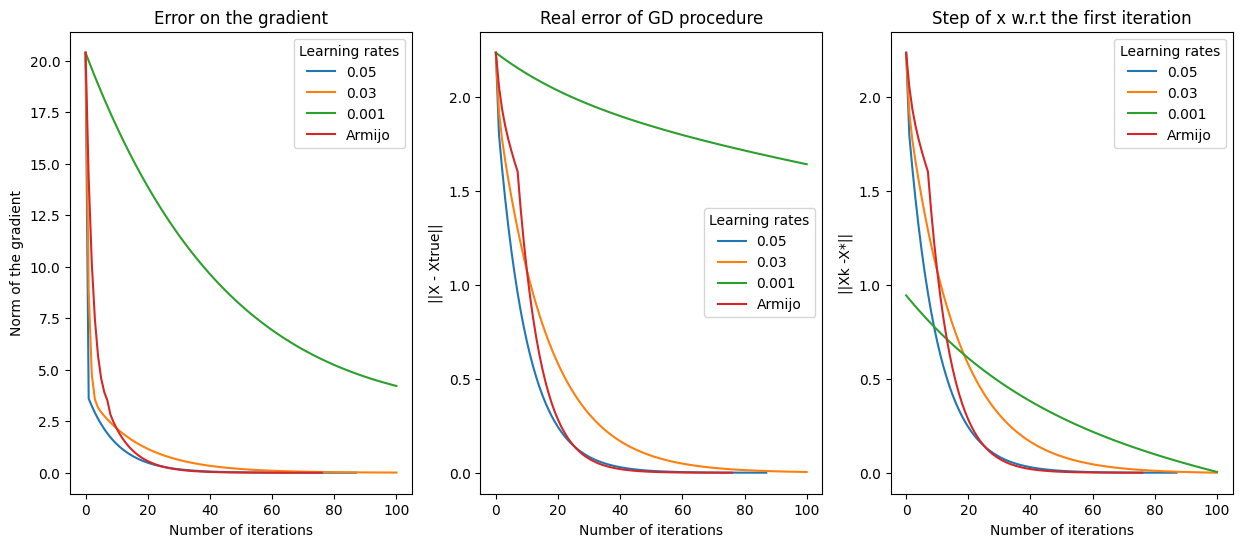

--------------------------------------------------------------------
--------------------------------------------------------------------
1:
Minimum obtained : [[1.        ]
 [1.99981191]] 
lr : 0.05 
Number of iterations : 88
2:
Minimum obtained : [[1.        ]
 [1.99613684]] 
lr : 0.03 
Number of iterations : 101
3:
Minimum obtained : [[0.87003284]
 [0.36614066]] 
lr : 0.001 
Number of iterations : 101
4:
Minimum obtained : [[1.        ]
 [1.99986034]] 
lr : Armijo 
Number of iterations : 77


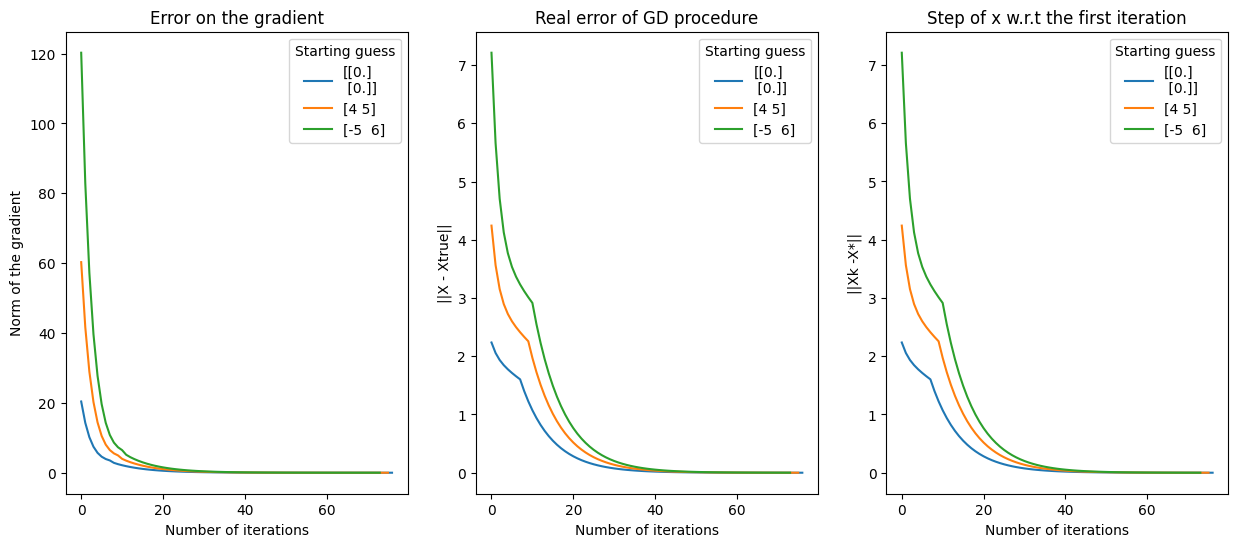

--------------------------------------------------------------------
--------------------------------------------------------------------
GD when tolerance changes
Iterations number = 94 tolf = 1e-06
Iterations number = 111 tolf = 1e-07
Iterations number = 128 tolf = 1e-08
Iterations number = 263 tolf = 1e-30


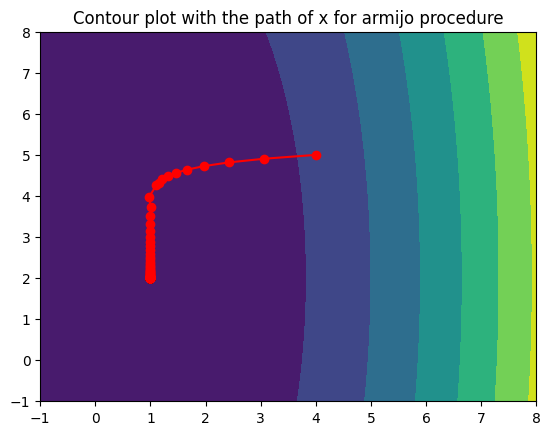

In [50]:
x0 = np.zeros((2, 1))

lrates = [0.05, 0.03, 0.001, "Armijo"]

real_min = np.array([1, 2])

min_predicted = []
iterations = []
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")
print("GD when alpha changes")
plt.figure(figsize=(15, 6))
for i, lr in enumerate(lrates):
    plt.subplot(1, 3, 1)
    x , _, err_val, x_val, grads = gradient_descent(f2, grad_f2, x0, kmax = 100 , lr=lr) 
    f1_plots(grads, lrates, real_min, x_val, x, "Learning rates")
    min_predicted.append(x)
    iterations.append(grads.shape[0])
plt.show()
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")
for i, min in enumerate(min_predicted):
    print("{}:\nMinimum obtained : {} \nlr : {} \nNumber of iterations : {}".format(i+1, min, lrates[i], iterations[i]))


st_guesses = [
    np.zeros((2, 1)),
    np.array([4, 5]),
    np.array([-5, 6])
]

plt.figure(figsize=(15, 6))
for i, sg in enumerate(st_guesses):
    plt.subplot(1, 3, 1)
    x , _, err_val, x_val, grads = gradient_descent(f2, grad_f2, sg, kmax = 100 , lr='Armijo') 
    f1_plots(grads, st_guesses, real_min, x_val, x, "Starting guess")
plt.show()
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")
print("GD when tolerance changes")
tolf_list = [1e-6, 1e-7, 1e-8, 1e-30]
iterations = []
for tol in tolf_list:
    x , _, err_val, x_val, grads = gradient_descent(
                                                    f2, grad_f2,
                                                    st_guesses[1], kmax = 1000 ,
                                                    lr='Armijo', tolf=tol, tolx=tol
                                    )     
    print("Iterations number = {} tolf = {}".format(grads.shape[0], tol))

# Contour
xv = np.linspace(-1, 8, 3000)
yv = np.linspace(-1, 8, 3000)
xx, yy = np.meshgrid(xv, yv)
# compute the value of f over the grid
zz = f2((xx, yy))
plt.plot(x_val[:, 0], x_val[:, 1], 'o-', c='red')
plt.contourf(xx, yy, zz)
plt.title("Contour plot with the path of x for armijo procedure")
plt.show()

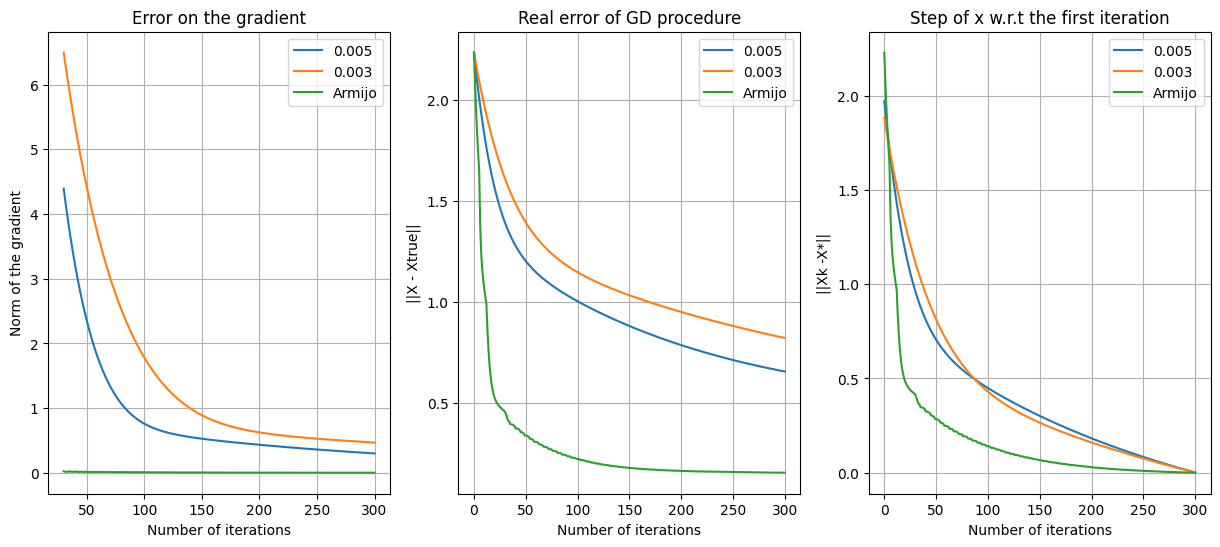

--------------------------------------------------------------------
--------------------------------------------------------------------
f3 gradient descent for N = 5
1:
lr : 0.005 
Number of iterations : 301
Final Error : 0.29891564242790425
 Starting error : 11.64512124438772
2:
lr : 0.003 
Number of iterations : 301
Final Error : 0.4665193369696514
 Starting error : 11.64512124438772
3:
lr : Armijo 
Number of iterations : 301
Final Error : 0.00046304172589575743
 Starting error : 11.64512124438772


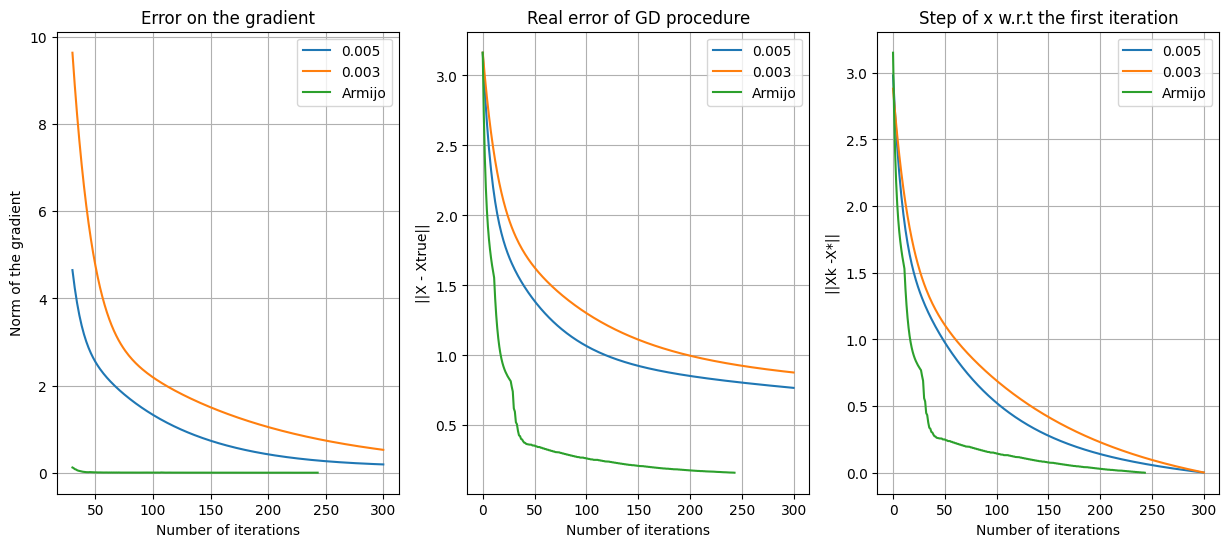

--------------------------------------------------------------------
--------------------------------------------------------------------
f3 gradient descent for N = 10
1:
lr : 0.005 
Number of iterations : 301
Final Error : 0.19164737023436992
 Starting error : 35.45863774695526
2:
lr : 0.003 
Number of iterations : 301
Final Error : 0.5266693723587537
 Starting error : 35.45863774695526
3:
lr : Armijo 
Number of iterations : 244
Final Error : 0.0018083676864649758
 Starting error : 35.45863774695526


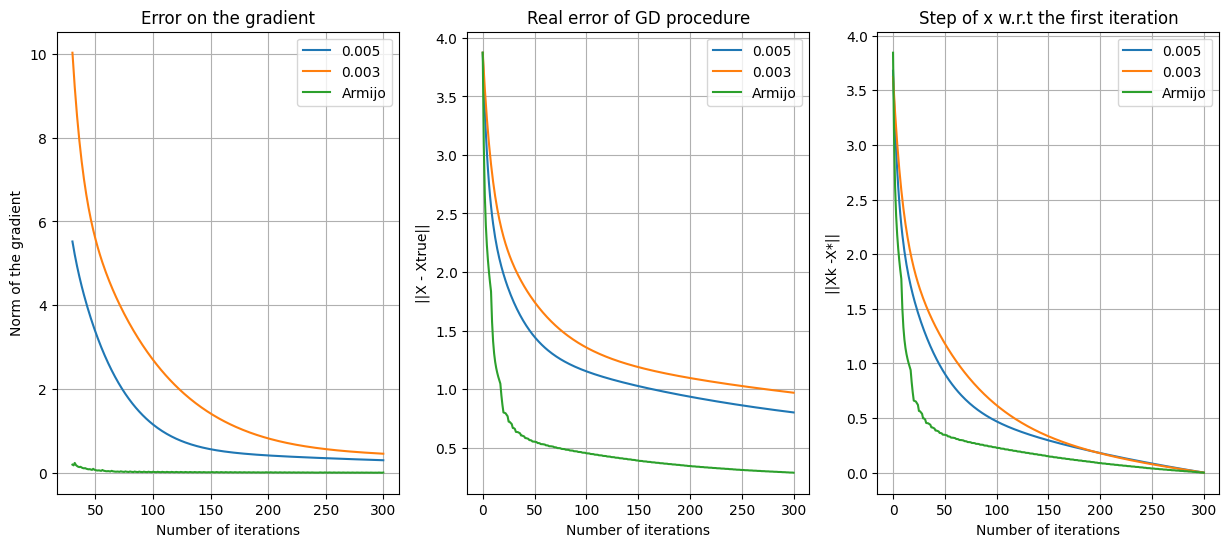

--------------------------------------------------------------------
--------------------------------------------------------------------
f3 gradient descent for N = 15
1:
lr : 0.005 
Number of iterations : 301
Final Error : 0.30568248336923093
 Starting error : 67.19070454920167
2:
lr : 0.003 
Number of iterations : 301
Final Error : 0.46112059245372156
 Starting error : 67.19070454920167
3:
lr : Armijo 
Number of iterations : 301
Final Error : 0.011479808768786154
 Starting error : 67.19070454920167


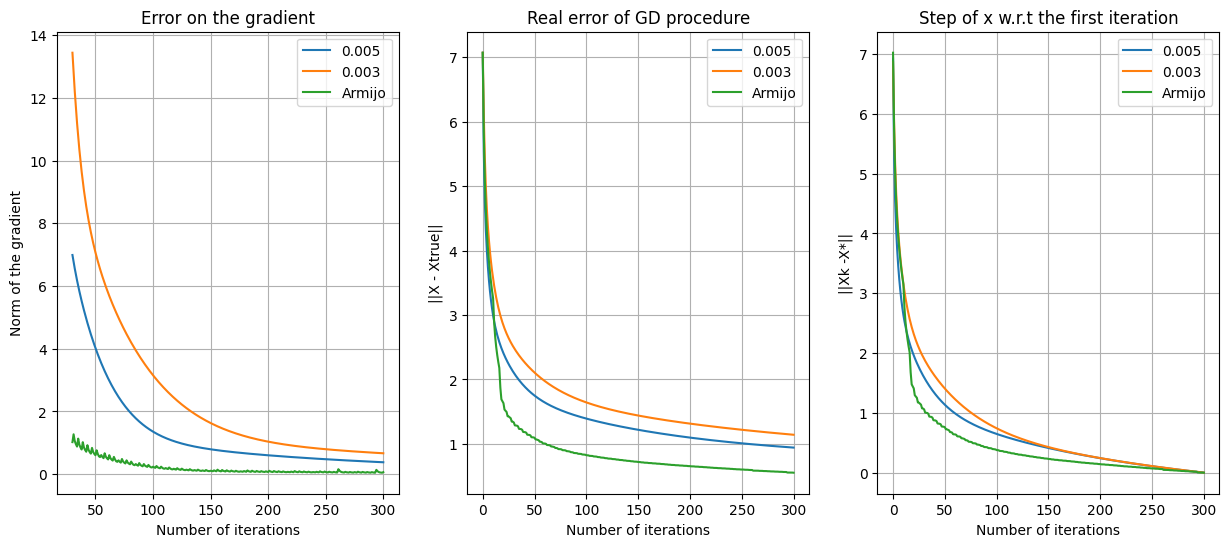

--------------------------------------------------------------------
--------------------------------------------------------------------
f3 gradient descent for N = 50
1:
lr : 0.005 
Number of iterations : 301
Final Error : 0.3796980452485134
 Starting error : 431.3083025850996
2:
lr : 0.003 
Number of iterations : 301
Final Error : 0.6663586336165546
 Starting error : 431.3083025850996
3:
lr : Armijo 
Number of iterations : 301
Final Error : 0.06471055461184584
 Starting error : 431.3083025850996
--------------------------------------------------------------------
--------------------------------------------------------------------
Gradient descent iteration when tolerances changes
Iterations number = 3500 tolf = 1e-06
Iterations number = 10001 tolf = 1e-07
Iterations number = 10001 tolf = 1e-08
Iterations number = 10001 tolf = 1e-30


In [69]:
N = [5, 10, 15, 50]


lrates = [0.005, 0.003, "Armijo"]


for n in N:
    min_predicted = []
    iterations = []
    x0 = np.zeros((n, 1))
    real_min = np.ones((1, n))
    plt.figure(figsize=(15, 6))

    grads_list = []
    for lr in lrates:
        plt.subplot(1, 3, 1)
        x , _, err_val, x_val, grads = gradient_descent(f3(n), grad_f3(n), x0, kmax = 300 , lr=lr) 

        plt.plot(range(30, grads.shape[0]), np.linalg.norm(grads[30:], axis = 1))
        plt.title("Error on the gradient")
        plt.xlabel("Number of iterations")
        plt.ylabel("Norm of the gradient")
        plt.yticks()
        plt.grid()
        plt.legend(lrates)
        
        plt.subplot(1, 3, 2)
        plt.plot(range(x_val.shape[0]), np.linalg.norm(x_val - real_min, axis = 1))
        plt.title("Real error of GD procedure")
        plt.xlabel("Number of iterations")
        plt.ylabel("||X - Xtrue||")
        plt.grid()
        plt.legend(lrates)

        plt.subplot(1, 3, 3)
        plt.plot(range(x_val.shape[0]), np.linalg.norm(x_val - x.T, axis = 1))
        plt.title("Step of x w.r.t the first iteration")
        plt.xlabel("Number of iterations")
        plt.ylabel("||Xk -X*||")
        plt.grid()
        plt.legend(lrates)
        grads_list.append(grads)
        min_predicted.append(x)
        iterations.append(grads.shape[0])
    plt.show()
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    print("f3 gradient descent for N = {}".format(n))
    for i, min in enumerate(min_predicted):
        print("{}:\nlr : {} \nNumber of iterations : {}".format(i+1, lrates[i], iterations[i]))
        print(
            "Final Error : {}\n Starting error : {}".format(
                                        np.linalg.norm(grads_list[i][-1]), 
                                        np.linalg.norm(grads_list[i][0]))
        )
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")
print("Gradient descent iteration when tolerances changes")
tolf_list = [1e-6, 1e-7, 1e-8, 1e-30]
iterations = []
for tol in tolf_list:
    x , _, err_val, x_val, grads = gradient_descent(
                                                    f3(N[-1]), grad_f3(N[-1]),
                                                    np.zeros((N[-1], 1)), kmax = 10000 ,
                                                    lr='Armijo', tolf=tol, tolx=tol
                                    )     
    print("Iterations number = {} tolf = {}".format(grads.shape[0], tol))


# f4

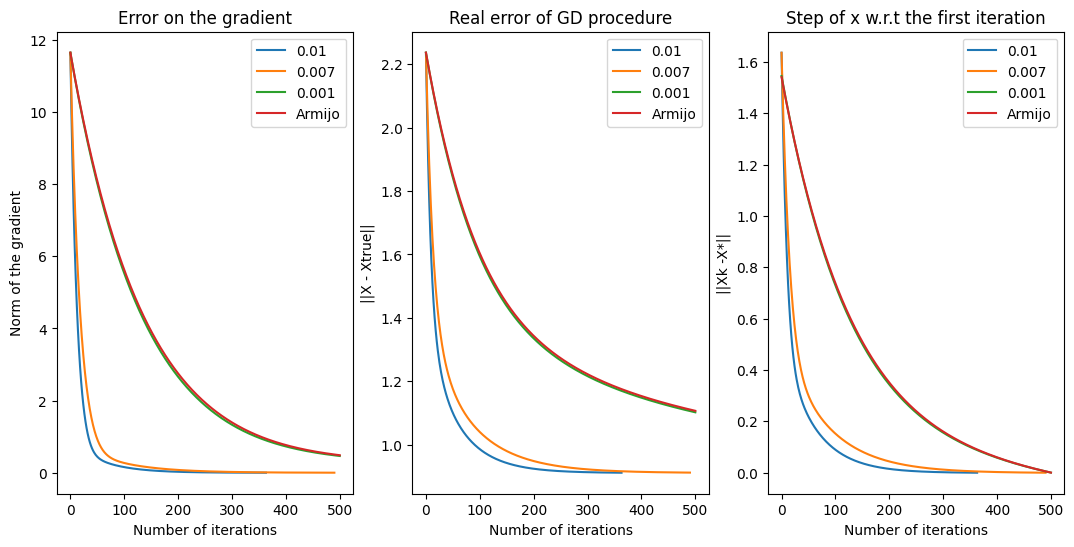

--------------------------------------------------------------------
--------------------------------------------------------------------
f4 gradient descent for N = 5; lambda = 1
4 4
1:
lr : 0.01 
Number of iterations : 364
2:
lr : 0.007 
Number of iterations : 491
3:
lr : 0.001 
Number of iterations : 501
4:
lr : Armijo 
Number of iterations : 501


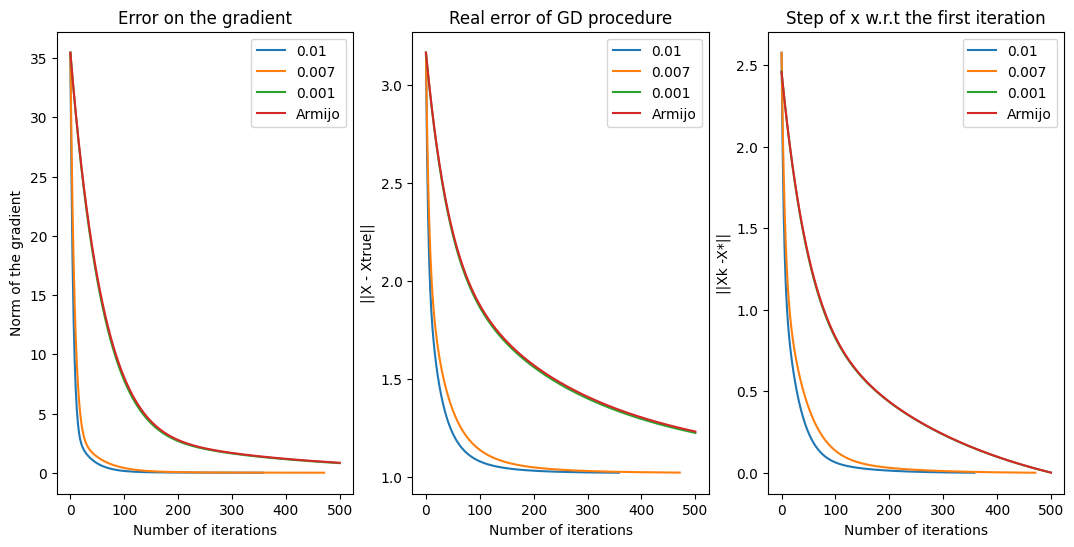

--------------------------------------------------------------------
--------------------------------------------------------------------
f4 gradient descent for N = 10; lambda = 1
4 4
1:
lr : 0.01 
Number of iterations : 364
2:
lr : 0.007 
Number of iterations : 491
3:
lr : 0.001 
Number of iterations : 501
4:
lr : Armijo 
Number of iterations : 501


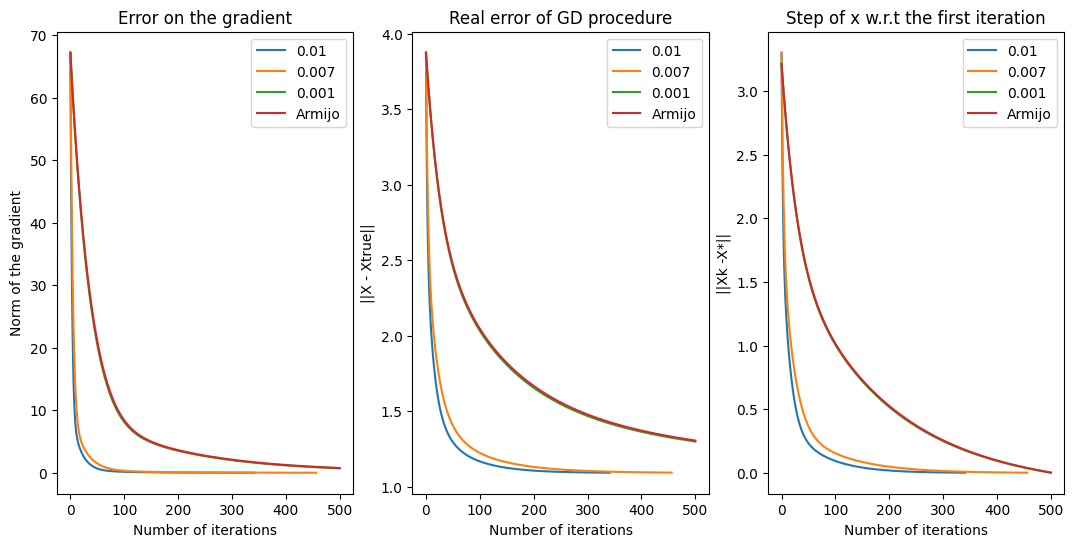

--------------------------------------------------------------------
--------------------------------------------------------------------
f4 gradient descent for N = 15; lambda = 1
4 4
1:
lr : 0.01 
Number of iterations : 364
2:
lr : 0.007 
Number of iterations : 491
3:
lr : 0.001 
Number of iterations : 501
4:
lr : Armijo 
Number of iterations : 501


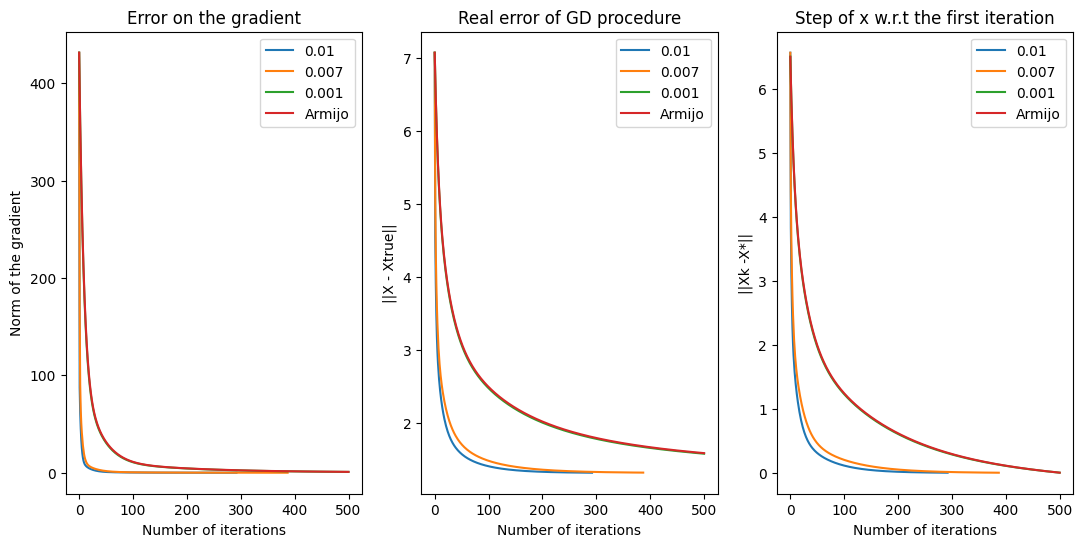

--------------------------------------------------------------------
--------------------------------------------------------------------
f4 gradient descent for N = 50; lambda = 1
4 4
1:
lr : 0.01 
Number of iterations : 364
2:
lr : 0.007 
Number of iterations : 491
3:
lr : 0.001 
Number of iterations : 501
4:
lr : Armijo 
Number of iterations : 501
Iterations number = 2998 tolf = 1e-06
Iterations number = 4722 tolf = 1e-07
Iterations number = 6749 tolf = 1e-08
Iterations number = 10001 tolf = 1e-30


In [84]:
N = [5, 10, 15, 50]

lb = [0.1, 0.5, 0.8, 1]

lrates = [0.01, 0.007, 0.001, "Armijo"]

lb0 = 1

for n in N:
    x0 = np.zeros((n, 1))
    real_min = np.ones((1, n))
    plt.figure(figsize=(13, 6))
    min_predicted = []
    for lr in lrates:
        plt.subplot(1, 3, 1)
        x , _, err_val, x_val, grads = gradient_descent(f4(n, lb0), grad_f4(n, lb0), x0, kmax = 500 , lr=lr) 
        
        plt.plot(range(grads.shape[0]), np.linalg.norm(grads, axis = 1))
        plt.title("Error on the gradient")
        plt.xlabel("Number of iterations")
        plt.ylabel("Norm of the gradient")
        plt.legend(lrates)
        
        plt.subplot(1, 3, 2)
        plt.plot(range(x_val.shape[0]), np.linalg.norm(x_val - real_min, axis = 1))
        plt.title("Real error of GD procedure")
        plt.xlabel("Number of iterations")
        plt.ylabel("||X - Xtrue||")
        plt.legend(lrates)

        plt.subplot(1, 3, 3)
        plt.plot(range(x_val.shape[0]), np.linalg.norm(x_val - x.T, axis = 1))
        plt.title("Step of x w.r.t the first iteration")
        plt.xlabel("Number of iterations")
        plt.ylabel("||Xk -X*||")
        plt.legend(lrates)

        min_predicted.append(x)
        iterations.append(grads.shape[0])
    plt.show()
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    print("f4 gradient descent for N = {}; lambda = {}".format(n, lb0))
    print(len(min_predicted), len(lrates))
    for i, min in enumerate(min_predicted):
        print("{}:\nlr : {} \nNumber of iterations : {}".format(i+1, lrates[i], iterations[i]))
    
    
tolf_list = [1e-6, 1e-7, 1e-8, 1e-30]
iterations = []
for tol in tolf_list:
    x , _, err_val, x_val, grads = gradient_descent(
                                                    f4(N[-1], lb0), grad_f4(N[-1], lb0),
                                                    np.zeros((N[-1], 1)), kmax = 10000 ,
                                                    lr='Armijo', tolf=tol, tolx=tol
                                    )     
    print("Iterations number = {} tolf = {}".format(grads.shape[0], tol))
        

# f5


--------------------------------------------------------------------
--------------------------------------------------------------------


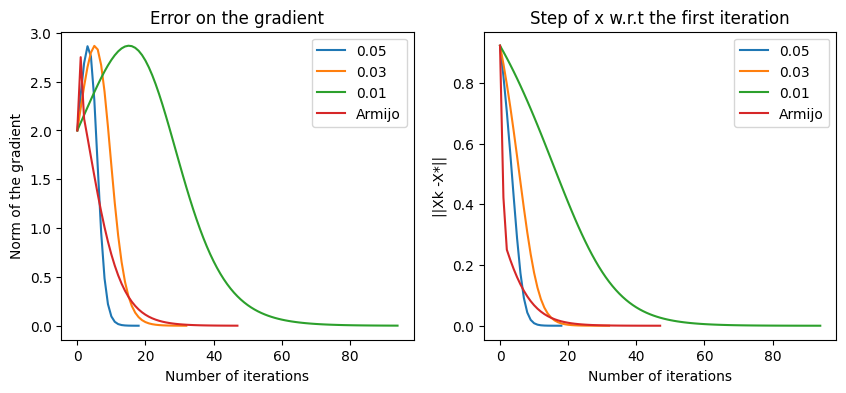

--------------------------------------------------------------------
--------------------------------------------------------------------
Starting guess : [[0.]]
1:
Minimum obtained : [[0.92222185]] 
lr : 0.05 
Number of iterations : 19
2:
Minimum obtained : [[0.92221343]] 
lr : 0.03 
Number of iterations : 33
3:
Minimum obtained : [[0.9221562]] 
lr : 0.01 
Number of iterations : 95
4:
Minimum obtained : [[0.92219092]] 
lr : Armijo 
Number of iterations : 48


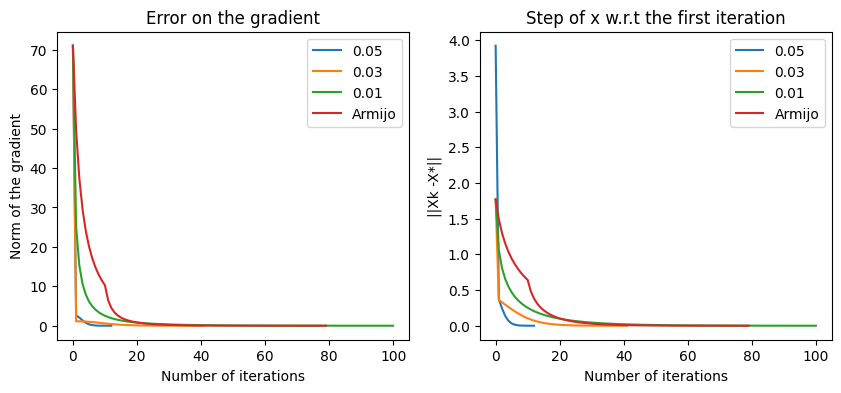

--------------------------------------------------------------------
--------------------------------------------------------------------
Starting guess : [-3]
1:
Minimum obtained : [0.92219498] 
lr : 0.05 
Number of iterations : 13
2:
Minimum obtained : [-1.23215255] 
lr : 0.03 
Number of iterations : 42
3:
Minimum obtained : [-1.23251015] 
lr : 0.01 
Number of iterations : 101
4:
Minimum obtained : [-1.23233765] 
lr : Armijo 
Number of iterations : 80


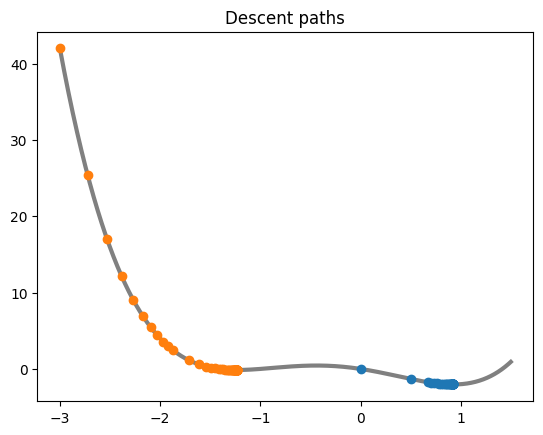

--------------------------------------------------------------------
--------------------------------------------------------------------
GD when tolerance changes
Iterations number = 59 tolf = 1e-06
Iterations number = 70 tolf = 1e-07
Iterations number = 82 tolf = 1e-08
Iterations number = 7400 tolf = 1e-13


In [115]:

starting_guesses = [np.zeros((1, 1)), np.array([-3])]

lrates = [0.05, 0.03, 0.01, "Armijo"]

min_predicted = []
iterations = []

print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")
for x0 in starting_guesses:
    plt.figure(figsize=(10, 4))
    min_predicted = []
    iterations = []
    for lr in lrates:
        plt.subplot(1, 2, 1)
        x , f_val, err_val, x_val, grads = gradient_descent(f5, grad_f5, x0, kmax = 100 , lr=lr) 

        plt.plot(range(grads.shape[0]), np.linalg.norm(grads, axis = 1))
        plt.title("Error on the gradient")
        plt.xlabel("Number of iterations")
        plt.ylabel("Norm of the gradient")
        plt.legend(lrates)

        plt.subplot(1, 2, 2)
        plt.plot(range(x_val.shape[0]), np.linalg.norm(x_val - x.T, axis = 1))
        plt.title("Step of x w.r.t the first iteration")
        plt.xlabel("Number of iterations")
        plt.ylabel("||Xk -X*||")
        plt.legend(lrates)
        min_predicted.append(x)
        iterations.append(grads.shape[0])
    plt.show()
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    print("Starting guess : {}".format(x0))
    for i, min in enumerate(min_predicted):
        print("{}:\nMinimum obtained : {} \nlr : {} \nNumber of iterations : {}".format(i+1, min, lrates[i], iterations[i]))

# f5 plotting
x = np.array(np.arange(-3, 1.5, 0.001))
y = [f5(i) for i in x]
plt.plot(x, y, linewidth = 3, c='grey')
for x0 in starting_guesses:
    _ , f_val, _, x_val, grads = gradient_descent(f5, grad_f5, x0, kmax = 100 , lr=lr) 
    plt.plot(x_val, f_val, 'o')
plt.title('Descent paths')
plt.show()


print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")
print("GD when tolerance changes")
tolf_list = [1e-6, 1e-7, 1e-8, 1e-13]
iterations = []
for tol in tolf_list:
    x , _, err_val, x_val, grads = gradient_descent(
                                                    f5, grad_f5,
                                                    np.array([0]), kmax = 10000 ,
                                                    lr='Armijo', tolf=tol, tolx=tol
                                    )     
    print("Iterations number = {} tolf = {}".format(grads.shape[0], tol))
    